In [167]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [168]:
# import dataset
insurance_data = pd.read_csv('C:\\Users\\Acer\\Downloads\\insurance.csv')

We'll work with the Insurance csv file from the company. It has Customer  suchas  sex,number of children,region
and does they smoke or not Then it also has numerical value columns:



- age : age of customer
- sex : gender of customer
- bmi : body mass index of customer
- children : number of children
- region : region customer belong

In [169]:
# head of dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [170]:
# information of data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 **here no missing values

In [171]:
# lets describe the data
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [172]:
#convert sex column in 0 and 1
def convert_sex(x):
    if x == "male":
        return 1
    if x == "female":
        return 0

In [173]:
# applying the fuction on column
insurance_data['sex']=insurance_data['sex'].apply(convert_sex)

In [174]:
# column converted in 0 and 1
insurance_data.sex.unique()


array([0, 1], dtype=int64)

In [175]:
#convert smoker column in 0 and 1
def convert_smoker(x):
    if x == "yes":
        return 1
    if x == "no":
        return 0

In [176]:
insurance_data['smoker']=insurance_data['smoker'].apply(convert_smoker)

In [177]:
insurance_data.smoker.unique()

array([1, 0], dtype=int64)

# EDA of Dataset


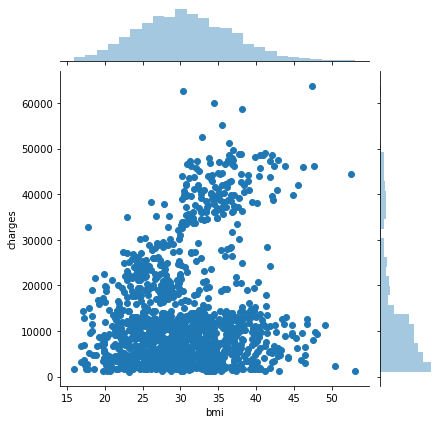

In [178]:
# jointplot of bmi and charges
sns.jointplot(x ="bmi",y ='charges',data =insurance_data)

bmi is linearly correlated to charges

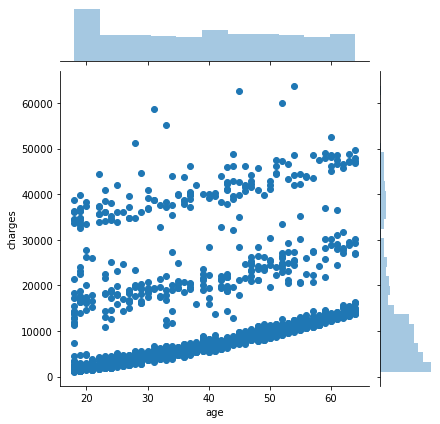

In [72]:
sns.jointplot(x ="age",y ='charges',data =insurance_data)

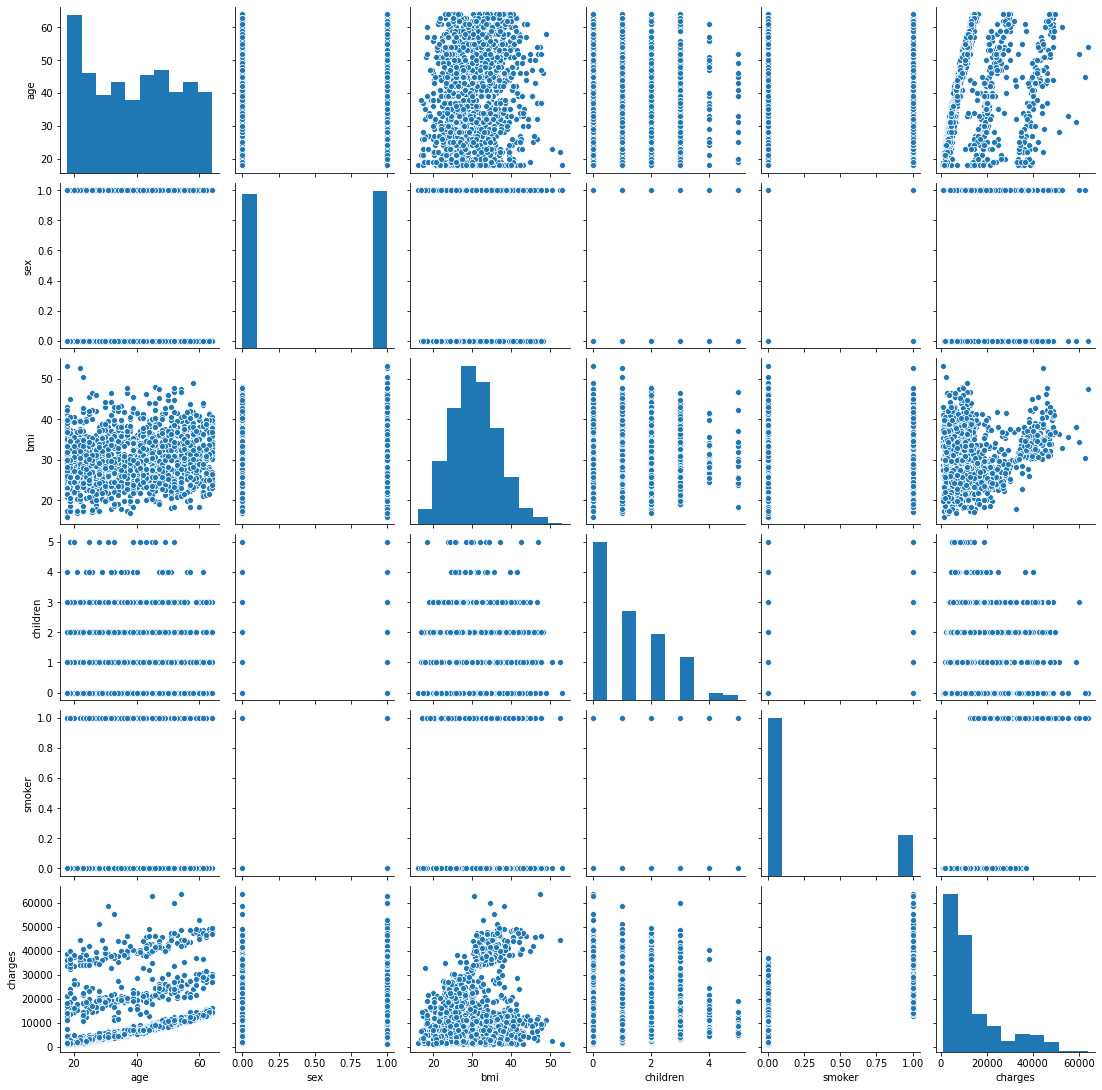

In [179]:
sns.pairplot(data=insurance_data)

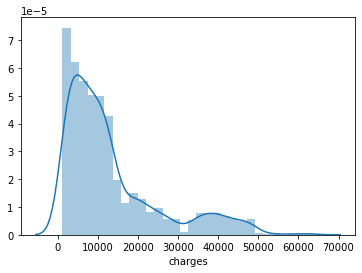

In [180]:
# distribution plot of charges
sns.distplot(insurance_data['charges'])

- tht above graph is positively skewed means that mean of the charges is less than median and mode

- it also say that most of the cutomers have pay less  charges that is below 20000

**region column contain 4 different categorical data type ,we have to convert
it in dummy variables to  fir in regression**

In [183]:
# adding dummy variable
insurance_data = pd.get_dummies(insurance_data, prefix_sep='', 
                            columns=['region'])


In [186]:
# data with dummy variable
insurance_data.head()

,age,sex,bmi,children,smoker,charges,regionnortheast,regionnorthwest,regionsoutheast,regionsouthwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


# Assigning data to regressor (x) and response(y) variable

In [187]:

x = insurance_data[['age','sex','bmi','children','smoker','regionnortheast','regionnorthwest','regionsoutheast']]

y = insurance_data['charges']

In [108]:
# spliting data in training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [188]:
# get number of observation in training data testing data
print('number of data in training',x_train.shape[0])
print('number of data in testing',x_test.shape[0])

number of data in training 1003
number of data in testing 335


In [190]:
# import the Regresionmodel and fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [191]:
# predictive the data
y_pred = regressor.predict(x_test)

Text(0, 0.5, 'y_pred')

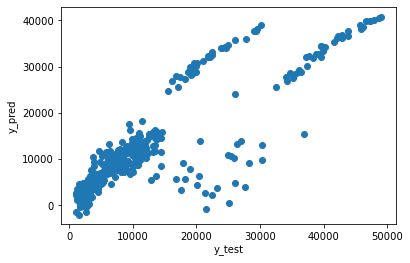

In [192]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel('y_pred')

- y_pred and y_test scatter plot look like linearly correlated so model is working good for prediction

In [193]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [  268.12836201  -290.1749683    358.20636099   494.15153167
 24266.86171871   830.53247727   471.50811659  -392.41080176]


In [194]:
# calculate these metrics by hand!
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4261.991611907156
MSE: 39731179.97921165
RMSE: 6303.26740502191


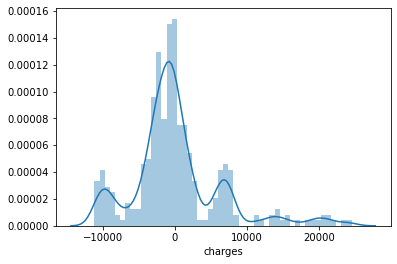

In [195]:
sns.distplot((y_test-y_pred),bins=50);

 histogram of the residuals is looks normally distributed. it say that we 
have a good model

In [197]:
# coeffecients
coeffecients = pd.DataFrame(regressor.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,268.128362
sex,-290.174968
bmi,358.206361
children,494.151532
smoker,24266.861719
regionnortheast,830.532477
regionnorthwest,471.508117
regionsoutheast,-392.410802


 Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **age** is associated with an **increase of 268.128362 total charges**.
- Holding all other features fixed, a 1 unit increase in **sex** is associated with an **increase of -290.1749688.59 total charges**.
- Holding all other features fixed, a 1 unit increase in **bmi** is associated with an **increase of 358.206361 total charges**.
- Holding all other features fixed, a 1 unit increase in **smoker** is associated with an **increase of 24266.861719total charges**.
- region also play important role in charges northeast and northwest have more charges